# Preliminary Model Build for Mockup

In [23]:
# Import Warnings and Dependencies
import warnings
warnings.filterwarnings('ignore')
# Import Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pathlib import Path
from collections import Counter



In [2]:
# import sklearn functions as needed 2022.11.1 Load then remove
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

### Data to Load

In [3]:
# Load in Data
file_path = Path("..\Data\Model_Data\combined_data.csv") 
# Pulled in cleaned combined_data from SQL database directly
housing_data_df = pd.read_csv(file_path)
housing_data_df


,region_id,region_desc,week,sales_inventory,civilian_labor_force,employment,unemployment,unemployment_rate,med_house_price,rent_index,sales_count
0,394463,"Chicago, IL",3/31/2018,38581,4963614.0,4753730.0,209884.0,4.2,284600,1610.46,9053
1,394463,"Chicago, IL",4/30/2018,42253,4960889.0,4756797.0,204092.0,4.1,294600,1622.52,11208
2,394463,"Chicago, IL",5/31/2018,45757,4959982.0,4759532.0,200450.0,4.0,300600,1634.70,13708
3,394463,"Chicago, IL",6/30/2018,47492,4961285.0,4762416.0,198869.0,4.0,302267,1645.26,15524
4,394463,"Chicago, IL",7/31/2018,48984,4964193.0,4765720.0,198473.0,4.0,301967,1651.54,14358
...,...,...,...,...,...,...,...,...,...,...,...
270,394902,"Nashville, TN",5/31/2022,4590,1138543.0,1107909.0,30634.0,2.7,479967,1860.25,3382
271,394902,"Nashville, TN",6/30/2022,5436,1139523.0,1108733.0,30790.0,2.7,494966,1884.61,3700
272,394902,"Nashville, TN",7/31/2022,6341,1137422.0,1106593.0,30829.0,2.7,498300,1910.61,3041
273,394902,"Nashville, TN",8/31/2022,7106,1134574.0,1103911.0,30663.0,2.7,499633,1923.84,2859


In [4]:
# Check data types
housing_data_df.dtypes

region_id                 int64
region_desc              object
week                     object
sales_inventory           int64
civilian_labor_force    float64
employment              float64
unemployment            float64
unemployment_rate       float64
med_house_price           int64
rent_index              float64
sales_count               int64
dtype: object

In [ ]:
# Need to remove latest data with 9/30/2022 since unemployment wasn't included
#housing_data_df = housing_data_df.loc[(housing_data_df["week"] == "9/30/2022")]
#housing_data_df

In [38]:
#housing_data_cleaned = housing_data_df.drop(housing_data_df.index[[54,109,164,219,274]])
housing_data_cleaned = housing_data_df.dropna()
housing_data_cleaned.shape
housing_data_cleaned

,region_id,region_desc,week,sales_inventory,civilian_labor_force,employment,unemployment,unemployment_rate,med_house_price,rent_index,sales_count
0,394463,"Chicago, IL",3/31/2018,38581,4963614.0,4753730.0,209884.0,4.2,284600,1610.46,9053
1,394463,"Chicago, IL",4/30/2018,42253,4960889.0,4756797.0,204092.0,4.1,294600,1622.52,11208
2,394463,"Chicago, IL",5/31/2018,45757,4959982.0,4759532.0,200450.0,4.0,300600,1634.70,13708
3,394463,"Chicago, IL",6/30/2018,47492,4961285.0,4762416.0,198869.0,4.0,302267,1645.26,15524
4,394463,"Chicago, IL",7/31/2018,48984,4964193.0,4765720.0,198473.0,4.0,301967,1651.54,14358
...,...,...,...,...,...,...,...,...,...,...,...
269,394902,"Nashville, TN",4/30/2022,3895,1134591.0,1104357.0,30234.0,2.7,458300,1840.38,3253
270,394902,"Nashville, TN",5/31/2022,4590,1138543.0,1107909.0,30634.0,2.7,479967,1860.25,3382
271,394902,"Nashville, TN",6/30/2022,5436,1139523.0,1108733.0,30790.0,2.7,494966,1884.61,3700
272,394902,"Nashville, TN",7/31/2022,6341,1137422.0,1106593.0,30829.0,2.7,498300,1910.61,3041


### Split the Data Into Training and Testing

In [6]:
# Create our features
y = housing_data_cleaned["med_house_price"]
X = housing_data_cleaned.drop(columns=["med_house_price","region_desc","week"]) # TBD based on factors to pull in
X.head(10) #Confirm Out has med_house_price dropped? =Yes

,region_id,sales_inventory,civilian_labor_force,employment,unemployment,unemployment_rate,rent_index,sales_count
0,394463,38581,4963614.0,4753730.0,209884.0,4.2,1610.46,9053
1,394463,42253,4960889.0,4756797.0,204092.0,4.1,1622.52,11208
2,394463,45757,4959982.0,4759532.0,200450.0,4.0,1634.70,13708
3,394463,47492,4961285.0,4762416.0,198869.0,4.0,1645.26,15524
4,394463,48984,4964193.0,4765720.0,198473.0,4.0,1651.54,14358
5,394463,49782,4969483.0,4770051.0,199432.0,4.0,1650.94,13634
6,394463,49630,4976756.0,4775171.0,201585.0,4.1,1643.64,10809
7,394463,48916,4984436.0,4779818.0,204618.0,4.1,1632.04,11088
8,394463,46495,4992719.0,4784079.0,208640.0,4.2,1623.91,9566
9,394463,42304,5000345.0,4787426.0,212919.0,4.3,1618.47,8519


In [7]:
# Import sklearn model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
# Create the scaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
#Fitting the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Determine the Model Type
Based on continuous target value and use to prediction, we are using a Linear Regression model utilizing Naive Random Oversampling

Naive Random Oversampling

In [8]:
# Resample the training data with the RandomOversampler
# Implement Random Oversampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({363743: 5,
         289316: 5,
         298998: 5,
         327233: 5,
         327392: 5,
         307948: 5,
         324000: 5,
         314308: 5,
         297933: 5,
         332667: 5,
         408522: 5,
         311667: 5,
         363000: 5,
         309967: 5,
         348333: 5,
         328300: 5,
         413423: 5,
         308950: 5,
         316633: 5,
         287666: 5,
         368078: 5,
         308448: 5,
         322467: 5,
         351633: 5,
         416300: 5,
         367333: 5,
         329300: 5,
         368662: 5,
         299933: 5,
         300600: 5,
         283333: 5,
         345000: 5,
         321058: 5,
         318000: 5,
         333333: 5,
         297667: 5,
         319583: 5,
         326633: 5,
         331433: 5,
         287650: 5,
         297967: 5,
         307667: 5,
         503283: 5,
         505967: 5,
         319450: 5,
         364483: 5,
         423150: 5,
         299633: 5,
         401661: 5,
         289965: 5,


In [13]:
# Train the Logistic Regression model using the resampled data
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit the model
model.fit(X_resampled,y_resampled)

LinearRegression()

In [14]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6584614469360068

In [18]:
# Calculate feature importance in the Linear Model
importances = model.coef_
for i,v in enumerate(importances):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -8791.77152
Feature: 1, Score: 15560.41699
Feature: 2, Score: -23357.53404
Feature: 3, Score: -25677.19075
Feature: 4, Score: 9837.61586
Feature: 5, Score: -4046.36477
Feature: 6, Score: 48855.25147
Feature: 7, Score: -21319.15187


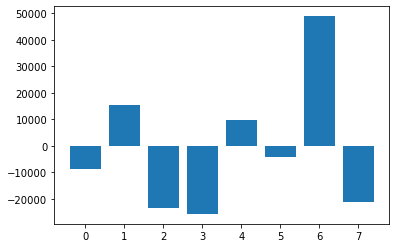

In [24]:
# Plot the importances
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()

## Alternative Model
Removing negative important features to check accuracy of model


In [37]:
# Remove Features 2, 3, 7 which are: 
# civilian_labor_force, employment, and sales count
# Create our features
y = housing_data_cleaned["med_house_price"]
X = housing_data_cleaned.drop(columns=["med_house_price","region_desc","week","civilian_labor_force","employment","sales_count"]) # TBD based on factors to pull in
X.head(10) #Confirm Out has med_house_price dropped? =Yes

,region_id,sales_inventory,unemployment,unemployment_rate,rent_index
0,394463,38581,209884.0,4.2,1610.46
1,394463,42253,204092.0,4.1,1622.52
2,394463,45757,200450.0,4.0,1634.70
3,394463,47492,198869.0,4.0,1645.26
4,394463,48984,198473.0,4.0,1651.54
5,394463,49782,199432.0,4.0,1650.94
6,394463,49630,201585.0,4.1,1643.64
7,394463,48916,204618.0,4.1,1632.04
8,394463,46495,208640.0,4.2,1623.91
9,394463,42304,212919.0,4.3,1618.47


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
# Create the scaler instance
scaler = StandardScaler().fit(X_train)
#Fitting the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
#Rerun resampling model
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)
#Refit the resampled model
model.fit(X_resampled,y_resampled)

# Re-calculated the balanced accuracy score
y_pred = model.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.6326818872396764

#### Conclusion From Alternative Model
Accuracy is slightly lower. Features brought in are not very impactful to the model but give a little more accuracy

### Visualization of Model
Utilizing 2D Model of Single Variable and 3D Model of top variables

In [45]:
# Define X and Y for single variable visualization
# Utilizing highest variable importance
import matplotlib.pyplot as plt
homePrice = housing_data_cleaned["med_house_price"].values
rent = housing_data_cleaned["rent_index"].values.reshape(-1,1)

In [46]:
#Build model with single variable
sv_model = model.fit(rent,homePrice)
response = sv_model.predict(rent)

In [47]:
#Evaluate sv model
r2sv = sv_model.score(rent, homePrice)

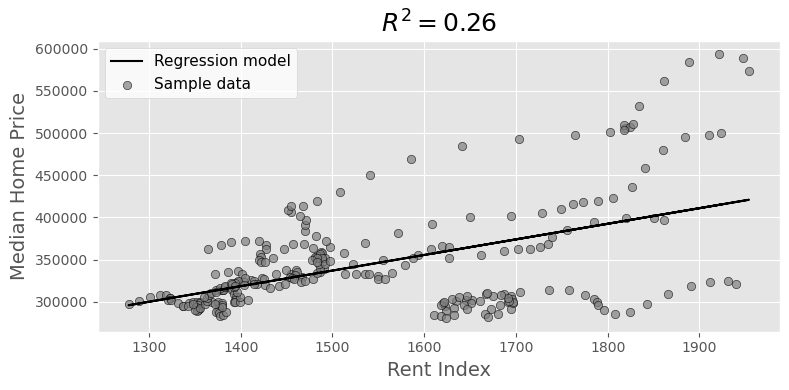

In [48]:
# Plot with above
from matplotlib.pyplot import savefig


plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(rent, response, color='k', label='Regression model')
ax.scatter(rent, homePrice, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Median Home Price', fontsize=14)
ax.set_xlabel('Rent Index', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2sv, fontsize=18)

fig.tight_layout()
savefig('2DLinear.png')

Figure above on Single Variable shows the impact of each market on  and taking the overall but not well coorelated based on that clustering

In [49]:
# Build 3D chart for top features
homePrice = housing_data_cleaned["med_house_price"].values
rent = housing_data_cleaned[["rent_index","sales_inventory"]].values.reshape(-1,2)

x = rent[:,0]
y = rent[:,1]
z = homePrice

x_pred = np.linspace(0, 50000, 1000)   # range of porosity values
y_pred = np.linspace(1000, 2000, 100)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

#Build model with single variable
threed_model = model.fit(rent,homePrice)
predicted = threed_model.predict(model_viz)

#Evaluate sv model
r2threed = threed_model.score(rent, homePrice)

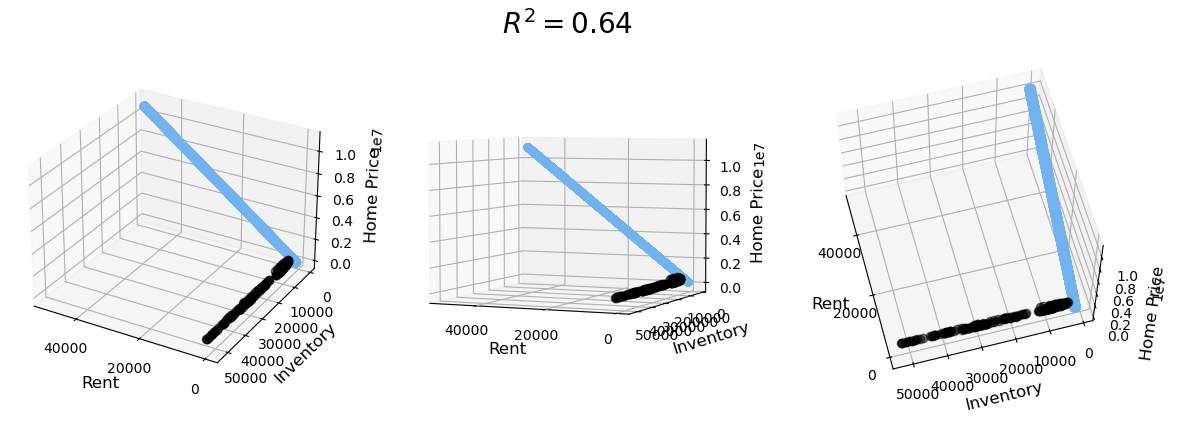

In [50]:
# Plot with above
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Rent', fontsize=12)
    ax.set_ylabel('Inventory', fontsize=12)
    ax.set_zlabel('Home Price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2threed, fontsize=20)

fig.tight_layout()
savefig('3DLinear.png')